In [1]:
!pip install pandas_datareader

In [2]:
from scipy import stats, optimize
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

# 1. Central Limit Theorem

(a) Create a 2-by-3 array of subplots. Fix k = 3 and instantiate an array N = [5, 10, 30] and a variable
size = 100, 000.
(b) Using a for loop, for each value n in N sample a size × n array of samples from the distribution t(k)
(c) Compute the sample average along each row (i.e. you should get size sample averages), and plot
their histogram in a subplot.
(d) Over the histogram (i.e. in the same subplot), plot the approximate density of the distribution of
sample averages which is given by the CLT as described above.
(e) In a separate subplot, display the QQ plot of the sample means versus their approximate distribution

In [3]:
k=3
N = [5, 10, 30, 100]
size = 100000

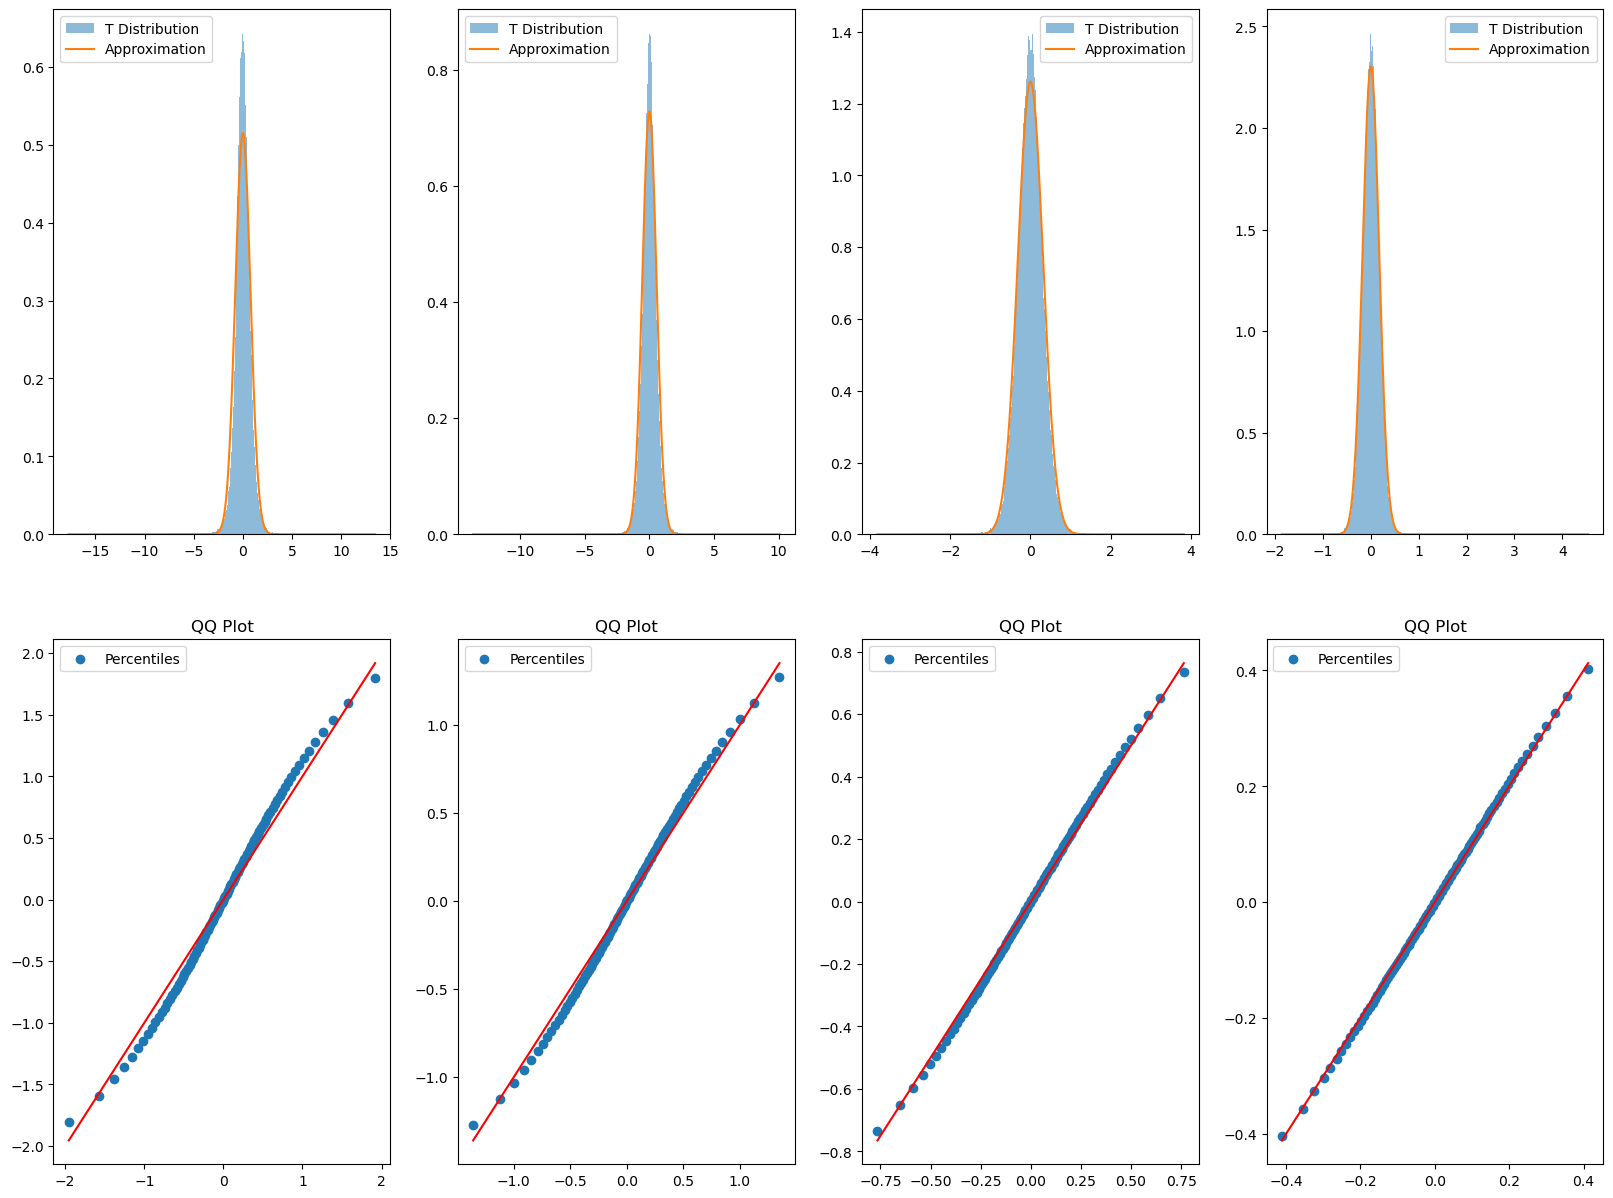

In [4]:
fig, axs = plt.subplots(2,4,figsize=(20,15))
hist_bins = int(size**0.5)
for idx, n in enumerate(N):
    # sampled t distribution
    samples = np.array([stats.t.rvs(k, size=n) for _ in range(size)])
    sample_mean = samples.mean(axis=1)
    axs[0,idx].hist(sample_mean, density=True, bins=hist_bins, alpha=0.5, label='T Distribution')
    axs[0,idx].legend()    
    # Normal Distribution with mean=0. variance=k/(k-2)N
    var = k/((k-2)*n)
    x = np.linspace(min(sample_mean), max(sample_mean), size)
    normal_dist = stats.norm.pdf(x, 0, var**0.5)
    axs[0,idx].plot(x, normal_dist, label='Approximation')
    axs[0,idx].legend()
    
    # qqplot
    perc = np.linspace(1,99,100)
    x_p = np.percentile(sample_mean, perc)
    y_p = stats.norm.ppf(perc/100, loc=0, scale=var**0.5)
    axs[1,idx].plot(x_p, x_p, color='red') # diagonal line
    axs[1,idx].scatter(x_p, y_p, label='Percentiles')
    axs[1,idx].legend()
    axs[1,idx].set_title('QQ Plot')


# 2. Time Series

In [5]:
import pandas_datareader.data as web

data = web.DataReader('^DJI', 'stooq', start='1995-01-01', end='2023-11-14')
data = data.reset_index()
data.sort_values(by='Date',ignore_index=True,inplace=True)
data.head(10)

,Date,Open,High,Low,Close,Volume
0,1995-01-03,3834.4,3864.7,3805.5,3838.5,24439679.0
1,1995-01-04,3838.5,3876.8,3815.3,3857.7,27227976.0
2,1995-01-05,3857.7,3876.8,3825.4,3850.9,25819073.0
3,1995-01-06,3850.9,3902.4,3823.7,3867.4,30237731.0
4,1995-01-09,3867.4,3889.3,3834.4,3861.4,20812282.0
5,1995-01-10,3861.4,3912.5,3844.9,3866.7,28254972.0
6,1995-01-11,3866.7,3899.7,3824.7,3862.0,28106292.0
7,1995-01-12,3862.0,3886.6,3831.4,3859.0,23747782.0
8,1995-01-13,3859.0,3924.3,3852.6,3908.5,30588225.0
9,1995-01-16,3908.5,3955.6,3890.0,3932.3,29243695.0


In [6]:
data.tail(10)

,Date,Open,High,Low,Close,Volume
7259,2023-11-01,33081.87,33337.15,33010.85,33274.58,309656721.0
7260,2023-11-02,33457.82,33852.96,33450.03,33839.08,320812366.0
7261,2023-11-03,33988.83,34163.63,33946.60,34061.32,311932463.0
7262,2023-11-06,34092.61,34167.26,33989.72,34095.86,268792617.0
7263,2023-11-07,34075.65,34206.98,34026.72,34152.60,285862242.0
7264,2023-11-08,34185.92,34252.75,33996.20,34112.27,282794277.0
7265,2023-11-09,34163.71,34167.54,33859.77,33891.94,333027530.0
7266,2023-11-10,34020.82,34310.36,33905.62,34283.10,305324236.0
7267,2023-11-13,34259.25,34405.84,34205.81,34337.87,248845725.0
7268,2023-11-14,34581.20,34931.01,34581.20,34827.70,333309169.0


In [7]:
dates = data["Date"]
dow = data["Close"].to_numpy()

(a) Plot this times series.

Text(0, 0.5, 'Closing')

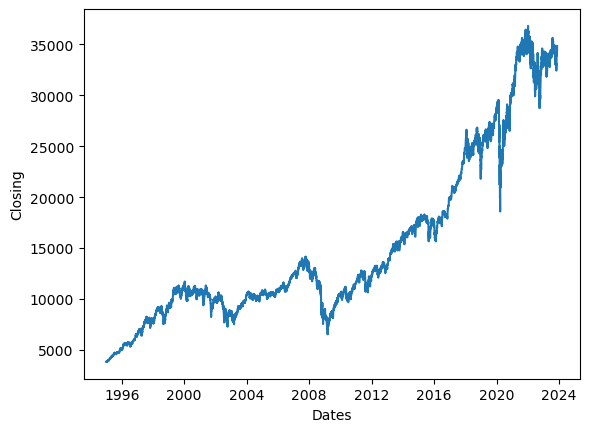

In [8]:
plt.plot(dates,dow)
plt.xlabel('Dates')
plt.ylabel('Closing')

(b) Compute the time series of (percentage) daily returns using the formula

In [9]:
close = dow

In [10]:
previous_close = data['Close'][:-1]

In [11]:
data['previous_close'] = [None]+previous_close.values.tolist()

In [12]:
data['daily_returns'] = (data['Close']/data['previous_close'] - 1)*100

In [13]:
daily_returns = data['daily_returns'][1:]

In [14]:
daily_returns

1       0.500195
2      -0.176271
3       0.428471
4      -0.155143
5       0.137256
          ...   
7264   -0.118088
7265   -0.645897
7266    1.154139
7267    0.159758
7268    1.426501
Name: daily_returns, Length: 7268, dtype: float64

In [15]:
data

,Date,Open,High,Low,Close,Volume,previous_close,daily_returns
0,1995-01-03,3834.40,3864.70,3805.50,3838.50,24439679.0,NaN,NaN
1,1995-01-04,3838.50,3876.80,3815.30,3857.70,27227976.0,3838.50,0.500195
2,1995-01-05,3857.70,3876.80,3825.40,3850.90,25819073.0,3857.70,-0.176271
3,1995-01-06,3850.90,3902.40,3823.70,3867.40,30237731.0,3850.90,0.428471
4,1995-01-09,3867.40,3889.30,3834.40,3861.40,20812282.0,3867.40,-0.155143
...,...,...,...,...,...,...,...,...
7264,2023-11-08,34185.92,34252.75,33996.20,34112.27,282794277.0,34152.60,-0.118088
7265,2023-11-09,34163.71,34167.54,33859.77,33891.94,333027530.0,34112.27,-0.645897
7266,2023-11-10,34020.82,34310.36,33905.62,34283.10,305324236.0,33891.94,1.154139
7267,2023-11-13,34259.25,34405.84,34205.81,34337.87,248845725.0,34283.10,0.159758


In [16]:
true_mean = daily_returns.mean()
true_mean

0.036946718761253244

In [17]:
std_dev = daily_returns.std()
std_dev

1.1478647050244521

In [18]:
variance = daily_returns.var()
variance

1.3175933810408726

(c) Compute the length-n sample averages of daily returns, starting at the first datapoint, for every
n ≥ 100. Thus the first datapoint in this time series will be the average of the first 100 daily returns,
the second will be the average of the first 101 daily returns, etc., and the last will be the average of
all daily returns. Plot this timeseries. Does it look like it obeys the weak Law of Large Numbers? If
yes explain why, if not explain why this might be the case.

In [19]:
sample_avgs = []
for n in range(100,daily_returns.shape[0]):
    mean = daily_returns[:n].mean()
    sample_avgs.append(mean)
sample_avgs[-1]

0.036755504489941235

In [20]:
# By the weak law of large numbers, the sample mean is a consistent estimator of the true mean in a small range of epsilon as number of samples `n` tends to infinity
# setting epsilon to a small value
epsilon = 0.01

In [21]:
for samples, sample_mean in enumerate(sample_avgs,100):
    print('Sample size',samples,'within epsilon interval?',abs(true_mean-sample_mean)<epsilon)

Sample size 100 within epsilon interval? False
Sample size 101 within epsilon interval? False
Sample size 102 within epsilon interval? False
Sample size 103 within epsilon interval? False
Sample size 104 within epsilon interval? False
Sample size 105 within epsilon interval? False
Sample size 106 within epsilon interval? False
Sample size 107 within epsilon interval? False
Sample size 108 within epsilon interval? False
Sample size 109 within epsilon interval? False
Sample size 110 within epsilon interval? False
Sample size 111 within epsilon interval? False
Sample size 112 within epsilon interval? False
Sample size 113 within epsilon interval? False
Sample size 114 within epsilon interval? False
Sample size 115 within epsilon interval? False
Sample size 116 within epsilon interval? False
Sample size 117 within epsilon interval? False
Sample size 118 within epsilon interval? False
Sample size 119 within epsilon interval? False
Sample size 120 within epsilon interval? False
Sample size 1

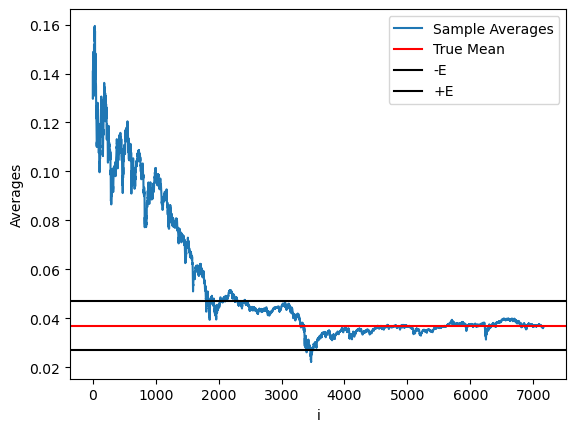

In [22]:
plt.plot(range(len(sample_avgs)),sample_avgs,label='Sample Averages')
plt.axhline(y = true_mean, color = 'r', label='True Mean')
plt.axhline(y = true_mean-epsilon, color='k', linestyle = '-', label = '-E')
plt.axhline(y = true_mean+epsilon, color='k', linestyle = '-', label = '+E')
plt.xlabel('i')
plt.ylabel('Averages')
plt.legend()

Answer: As the number of samples increase, the sample means come in epsilon range of the true mean. So it seems it follows the (weak) law of large numbers.

(d) Compute the length-100 rolling averages of daily returns. Plot a histogram of these sample averages.
Repeat with length-400 rolling averages. Does it look like these obey the Central Limit Theorem? If
yes explain why, if not explain why this might be the case.

In [23]:
# length 100 rolling average
sample_avgs_100 = []
for i in range(100,daily_returns.shape[0]):
    mean = daily_returns[i-100:i].mean()
    sample_avgs_100.append(mean)
sample_avgs_100 = np.array(sample_avgs_100)
sample_avgs_100.size

7168

In [24]:
sample_avgs_100.mean(), sample_avgs_100.std(), sample_avgs_100.var()

(0.036328257262809784, 0.08741081934354437, 0.007640651338309752)

In [25]:
stats.kurtosis(sample_avgs_100 ,fisher=False)

5.26193196533165

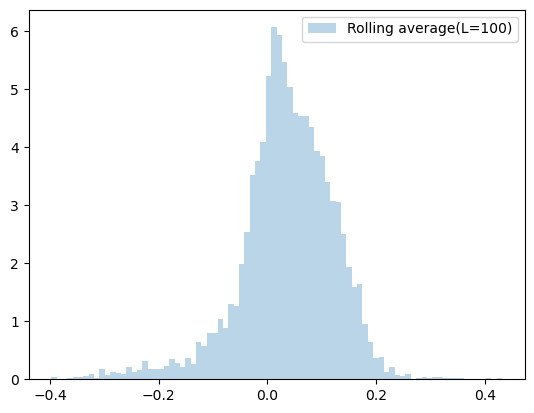

In [26]:
# plt.hist(daily_returns, bins=int(len(daily_returns)**0.5), density=True, alpha=0.3, label='Daily returns')
plt.hist(sample_avgs_100, bins=int(len(sample_avgs_100)**0.5), density=True, alpha=0.3, label='Rolling average(L=100)')
plt.legend()
plt.show()

In [27]:
# length 400 rolling average
sample_avgs_400 = []
for i in range(400,daily_returns.shape[0]):
    mean = daily_returns[i-400:i].mean()
    sample_avgs_400.append(mean)
sample_avgs_400 = np.array(sample_avgs_400)
sample_avgs_400.size

6868

In [28]:
sample_avgs_400.mean(), sample_avgs_400.std()

(0.03480701086882836, 0.04423531806681802)

In [29]:
stats.kurtosis(sample_avgs_400 ,fisher=False)

4.257300653665042

In [30]:
stats.kurtosis(stats.norm.pdf(np.linspace(-4,4,10000)),fisher=False)

2.0714795274220994

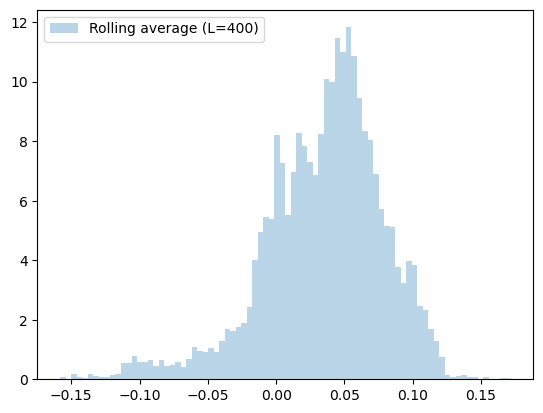

In [31]:
plt.hist(sample_avgs_400, bins=int(len(sample_avgs_400)**0.5), density=True, alpha=0.3, label='Rolling average (L=400)')
plt.legend()
plt.show()

In [32]:
# length 800 rolling average
sample_avgs_800 = []
for i in range(800,daily_returns.shape[0]):
    mean = daily_returns[i-800:i].mean()
    sample_avgs_800.append(mean)
sample_avgs_800 = np.array(sample_avgs_800)
sample_avgs_800.size

6468

In [33]:
sample_avgs_800.mean(), sample_avgs_800.std(), sample_avgs_800.var()

(0.033716603911449726, 0.028266098437703367, 0.0007989723208899367)

In [34]:
stats.kurtosis(sample_avgs_800, fisher=False)

3.0627509163219897

Answer: "The central limit theorem (CLT) states that the distribution of sample means approximates a normal distribution as the sample size gets larger, regardless of the population's distribution".
The computed rolling averages obey the central limit theorem. With a large n=800 and even n=400, we can see the distribution sample mean is slowly somewhat converging to a normal distribution having 0 mean and standard deviation equal to variance of the original distribution and a kurtosis of 3.

(e) Compute the sample mean, variance, skewness and kurtosis of the daily returns. Based on this
information, suggest which family of distributions might model these daily returns. Briefly justify
your choice.

In [35]:
mean = daily_returns.mean()
mean

0.036946718761253244

In [36]:
variance = daily_returns.var()
variance

1.3175933810408726

In [37]:
# standard deviation
variance**0.5

1.1478647050244521

In [38]:
skewness = stats.skew(daily_returns)
skewness

-0.1619562363391253

In [39]:
kurtosis = stats.kurtosis(daily_returns,fisher=False)
kurtosis

14.933353045800521

Answer: Based on the shape of the data, it belongs to a family of bell shape distributions. Based on the excess kurtosis, the data is not normal distribution. So it can be Cauchy or Student's T distribution. Since the weak law of large numbers holds, we can eliminate Cauchy distribution. Thus this distribution must belong to the T distribution.

(f) For this choice of family, you will now estimate the parameter(s) which best explain the data using
the Maximum Likelihood Estimator approach. To achieve this:
• Implement the function which needs to be maximized (this was explained in the lectures). The
parameter(s) which you are trying to estimate must of course be inputs to this function.
• Using the minimize function from scipy.optimize, find the optimal parameters. (Hint: maximizing f(x) is the same thing as minimizing −f(x)). You can use any of the actual minimization
methods, as long as it gives you a sensible answer.
• Once you have found the optimal parameters, plot the PDF of your optimal distribution against
a histogram of the daily returns.


In [40]:
est_dof, est_mean, est_std, est_var = 2, mean, variance**0.5, variance
est_dof, est_mean, est_std, est_var

(2, 0.036946718761253244, 1.1478647050244521, 1.3175933810408726)

In [41]:
def mle(params, data: np.array):
    """
    Return the sum of log of T distribution function value
    """
    dof, mean, std = params
    est = np.sum(
            stats.t.logpdf(data, dof, loc=mean, scale=std)
    )
    
    return -est

solution = optimize.minimize(mle, x0=(est_dof, est_mean, est_std), args=(daily_returns,))
solution

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 10318.389762473455
        x: [ 2.879e+00  6.240e-02  6.912e-01]
      nit: 13
      jac: [ 1.221e-04  3.662e-04 -1.221e-04]
 hess_inv: [[ 2.474e-04 -3.244e-06  1.724e-05]
            [-3.244e-06  1.211e-04 -3.510e-06]
            [ 1.724e-05 -3.510e-06  6.941e-05]]
     nfev: 84
     njev: 21

In [42]:
# Generating the PDF using the learned optimal parameters
x = np.linspace(min(daily_returns), max(daily_returns), daily_returns.shape[0])
est_pdf = stats.t.pdf(x, df=solution.x[0], loc=solution.x[1], scale=solution.x[2])
est_pdf

array([4.64064818e-05, 4.64524581e-05, 4.64984916e-05, ...,
       7.93659975e-05, 7.92759375e-05, 7.91860058e-05])

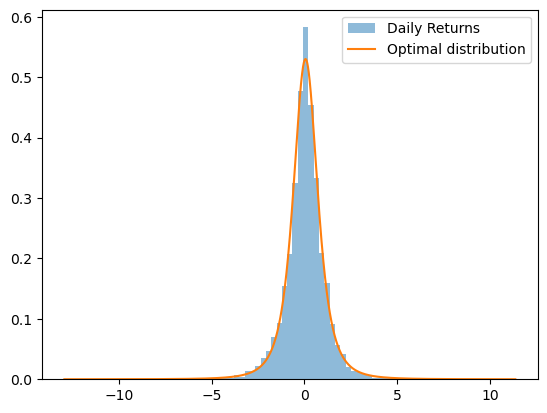

In [43]:
plt.hist(daily_returns, density=True, bins=int(len(daily_returns)**0.5), alpha=0.5, label='Daily Returns')
plt.plot(x, est_pdf, label='Optimal distribution')
plt.legend()

(g)  Check the results you obtained in the previous step by comparing it with the parameters you obtain from scipy’s fit function. Again, plot the PDF of the distribution with these parameters against a histogram of the daily returns.

In [44]:
fitted_params = stats.t.fit(daily_returns)
fitted_params

(2.8786937146897293, 0.062405594826361495, 0.6911724988346967)

In [45]:
fitted_dof, fitted_mean, fitted_std = fitted_params

Answer: The MLE solution values are similar the fitted parameters.

In [46]:
# Generating the PDF using the learned optimal parameters
x = np.linspace(min(daily_returns), max(daily_returns), daily_returns.shape[0])
est_pdf = stats.t.pdf(x, fitted_dof, fitted_mean, fitted_std)
est_pdf

array([4.64061569e-05, 4.64521330e-05, 4.64981663e-05, ...,
       7.93656641e-05, 7.92756042e-05, 7.91856726e-05])

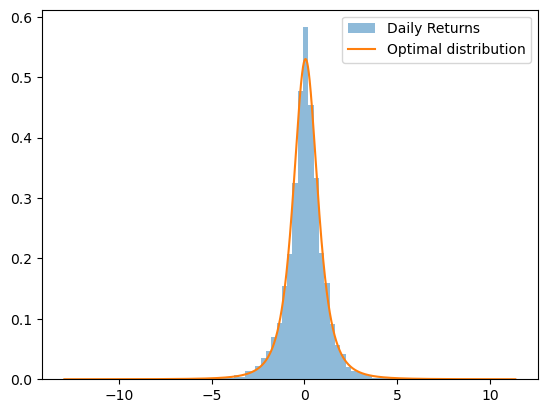

In [47]:
plt.hist(daily_returns, density=True, bins=int(len(daily_returns)**0.5), alpha=0.5, label='Daily Returns')
plt.plot(x, est_pdf, label='Optimal distribution')
plt.legend()